# Getting familiar with the image data

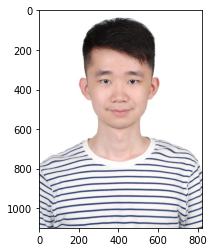

In [14]:
import matplotlib.pyplot as plt
data = plt.imread('Image/TestImage.jpg')
plt.imshow(data)
plt.show()

The first two dimensions represent the height and the width of the image, while the last element gives that there are 3 colour components in this pixel (R, G, B)

In [15]:
data.shape

(1100, 825, 3)

If the last dimension is 1, it means the image only has two colours, black and white.

Get the colour of a specified pixel

In [16]:
data[1000,500]

array([246, 241, 245], dtype=uint8)

Make our image data writable

In [25]:
# Copy the data into another variable because the original data cannot be written
img = data.copy()
print(img.flags)
# img.setflags(write=1)

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



In [26]:
# 1 means Green, 2 means Blue
print(data[500,500,1])
print(data[500,500,2])

188
175


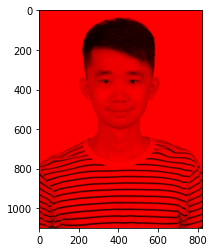

In [47]:
# Make our image has no green element
img[:, :, 1] = 0
# Make our image has no blue element
img[:, :, 2] = 0
plt.imshow(img)
plt.show()

Change the colour of a small piece of image 

In [44]:
img = data.copy()
img.shape

(1100, 825, 3)

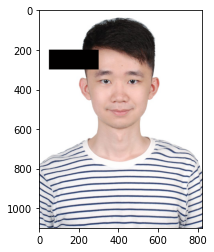

In [43]:
img[200:300, 50:300, :] = [1,0,0]
plt.imshow(img)
plt.show()

### White and Black images

High number means lighter and low number means darker

---

# Classify Images

1. One-hot encoding

![](Image/Image1.jpg)

2. 利用dummy variables的testing data和predicting data內積和，來判斷幾個observation預測正確

![](Image/Image2.jpg)

In [51]:
# An example of one-hot encoding
import numpy as np
# The number of image categories
n_categories = 3
labels = ['shoe', 'shirt', 'shoe', 'shirt', 'dress', 'dress', 'dress']

# The unique values of categories in the data
categories = np.array(["shirt", "dress", "shoe"])

# Initialize ohe_labels as all zeros
ohe_labels = np.zeros((len(labels), n_categories))

# Loop over the labels
for ii in range(len(labels)):
    # Find the location of this label in the categories variable
    jj = np.where(labels[ii] == categories)
    # Set the corresponding zero to one
    ohe_labels[ii,jj] = 1
    
print(ohe_labels)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [53]:
# An example of sum product of actual result and prediction result
test_labels = np.array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])
predictions = np.array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

# Number of correct predictions
n_c = (test_labels * predictions).sum()
print(n_c)

# Percentage of correct predictions
p_c = n_c/len(test_labels)
print(p_c)

6.0
0.75


# Classification with Keras

In [54]:
from keras.layers import Dense    # All neurons connect to every neurons in the last and the next layer (fully connected)
from keras.models import Sequential

In [ ]:
# Initializes a sequential model
model = Sequential()

# First layer
model.add(Dense(10, activation='relu', input_shape=(784,)))

# Second layer
model.add(Dense(10, activation='relu'))

# Output layer
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
           loss='categorical_crossentropy', 
           metrics=['accuracy'])

In [ ]:
X_train
# assume that the original shape of X_train is (1000, 28, 28, 1)
X_train = X_train.reshape(1000, 784)
# Change the shape to (1000, 784)

# Assume that there are 3 classes in the dependent variable
y_train
# assume that the original shape of X_test is (10, 28, 28, 1)
y_train = y_train.reshape(10, 3)
# Change the shape to (10, 3)

In [ ]:
# Fit the model
model.fit(X_train, y_train, validation_split = 0.3, epochs = 5)

## reshape the testing data as training data
X_test = X_test.reshape(100, 784)

# Assume that there are 3 classes in the dependent variable
y_test
# assume that the original shape of X_test is (10, 28, 28, 1)
y_test = y_test.reshape(10, 3)
# Change the shape to (10, 3)

In [ ]:
# Evaluate the model
model.evaluate(X_test, y_test)

---

# Convolution

Dense中第一層layer的每個neuron會有連接每個pixel的weight。然而，image的pixel與相鄰的pixel之間一定存在關聯性，因此Dense並沒有考量到相鄰pixel之間可能會比較類似，或是參考周圍的pixel來做判斷

![](Image/Image3.jpg)

## Find the edge by kernel

### Only one edge

In [67]:
# Assume there is an array that contains an "edge", where the value goes from 0 to 1 (edge detection)
array = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [68]:
# The kernel defines the feature that we are looking for 
# (in this case, we are looking for small values on the left and large values on the right)
kernel = np.array([-1,1])

In [69]:
# Create a result array
res = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Slide our kernel alone the array (the one we are looking for the edge)

In [73]:
for i in range(len(array)-1):
    res[i] = (array[i:i+2]*kernel).sum()
    
print("The location of the edge within the array is", res)

The location of the edge within the array is [0 0 0 0 1 0 0 0 0 0]


### Several edge

In [75]:
array = np.array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0])
res = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [76]:
for i in range(len(array)-1):
    res[i] = (array[i:i+2]*kernel).sum()
    
print("The location of the edge within the array is", res)

The location of the edge within the array is [ 0  1  0 -1  0  1  0 -1  0  0]


We can find that the edge will be shown at the **left point of each edge**

## Kernel Implementation in Image Convolution

Use a kernel like this to fetch vertical edges (which will be shown at the left-upper side of each edge according to the previous example)

![](Image/Image4.jpg)

After moving our kernel to this image, we got

![](Image/Image5.jpg)

### Let's practice

In [ ]:
# First, create the kernel
kernel = np.array([[-1, 1],
                 [-1, 1]])

# Second, create the result matrix
res = np.zeros(27, 27)

# Iteratively moving the kernel over the image
for i in range(27):
    for j in range(27):
        window = image[i:i+2, j:j+2]    # Specify a window (size equals to size of kernel), moving with the kernel
        res[i, j] = (kernel * window).sum()

## Kernel Visualisation and Feature Maps

Kernel in this case is a **3 * 3 array**, which is the **dark blue area** in the visuals. <br/>
The result res in this case is a **2 * 2 array**, which is the **green area** above the image and the kernel.

![](Image/Kernel1.jpg) 
![](Image/Kernel2.jpg)
![](Image/Kernel3.jpg)
![](Image/Kernel4.jpg)


The resulting array is also called a **"Feature Map"**

### Kernel Examples

In [ ]:
# Kernel that finds vertical edge
kernel = np.array([[-1, 1, -1], 
                   [-1, 1, -1],
                   [-1, 1, -1]])

# Kernel that finds horizontal edge
kernel = np.array([[-1, -1, -1], 
                   [1, 1, 1],
                   [-1, -1, -1]])

# Kernel that finds a light spot surrounded by dark pixels
kernel = np.array([[-1, -1, -1], 
                   [-1, 1, -1],
                   [-1, -1, -1]])

# Kernel that finds a dark spot surrounded by light pixels
kernel = np.array([[1, 1, 1], 
                   [1, -1, 1],
                   [1, 1, 1]])